## Imports

In [1]:
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
import os
import sys

import numpy as np

set_matplotlib_formats("pdf", "svg")

module_path = os.path.abspath('.')
sys.path.append(module_path + '/utils')

from random_matrix import *
from matrix_complete import *

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

/tmp/ipykernel_2603/2487567129.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("pdf", "svg")


## GOE Ensemble

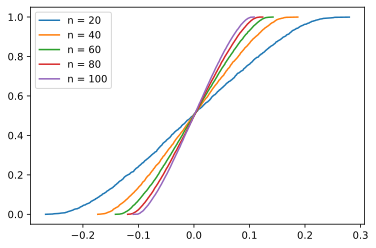

In [2]:
ns = np.arange(20, 101, 20)
num_samples = 100

for i, n in enumerate(ns): 
    plot_avg_GOE(n, num_samples, color=colors[i])

plt.legend()
plt.show()

## Wishart Ensemble

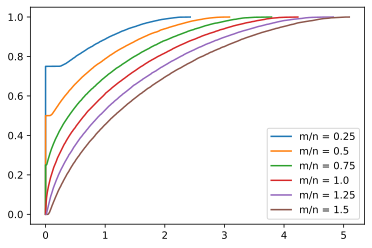

In [3]:
n = 100
num_samples = 100
ms = np.arange(25, 151, 25)

for i, m in enumerate(ms):
    plot_avg_wishart(n, m, num_samples, color=colors[i])

plt.legend()
plt.show()

## Matrix Completion

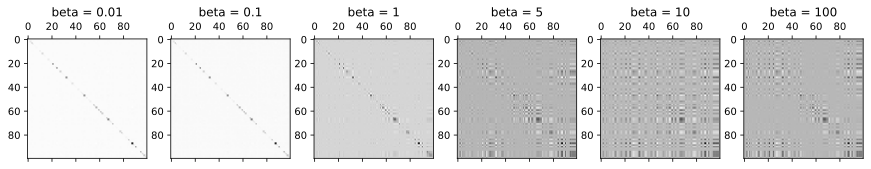

In [5]:
n = 100
r = sample_r(n)
num_samples = 100000
betas = [0.01, 0.1, 1, 5, 10, 100]
P_betas = []

fig, axs = plt.subplots(1, 6, figsize=(15, 6))
for i, beta in enumerate(betas):
    P_beta = run_mcmc(samples=num_samples, r=r, beta=beta)
    im = axs[i].matshow(P_beta, cmap=plt.cm.Greys)
    axs[i].set_title('beta = ' + str(beta))

    P_betas.append(P_beta)

## Sampling with $P_\beta$ as covariance

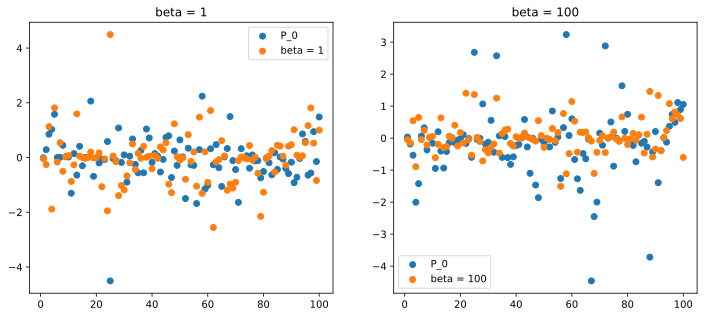

In [27]:
P_0 = create_P0(r)
num_g_vecs = 1000
x_vals = np.arange(1, 101, 1)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(x_vals, sample_cov(P_0, 1).transpose(), label="P_0")
axs[0].scatter(x_vals, sample_cov(P_betas[2], 1).transpose(), label="beta = " + str(betas[2]))
axs[0].set_title('beta = ' + str(betas[2]))
axs[0].legend()
axs[1].scatter(x_vals, sample_cov(P_0, 1).transpose(), label="P_0")
axs[1].scatter(x_vals, sample_cov(P_betas[5], 1).transpose(), label="beta = " + str(betas[5]))
axs[1].set_title('beta = ' + str(betas[5]))
axs[1].legend()

plt.show()